In [14]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import FFT
from darts.metrics import mape,mae,rmse
import warnings

warnings.filterwarnings("ignore")
import logging

logging.disable(logging.CRITICAL)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
# 1. Data preprocessing
df = pd.read_csv('../../Dataset/ACB-Historical-Data_Group-9.csv')
df['Price'] = df['Price'].str.replace(',', '').astype(float)
df['Date'] = pd.to_datetime(df['Date'],format='mixed')
df = df[['Date','Price']]
df

,Date,Price
0,2019-03-01,11361.0
1,2019-03-04,11512.4
2,2019-03-05,11474.6
3,2019-03-06,11474.6
4,2019-03-07,11550.3
...,...,...
1303,2024-05-27,29450.0
1304,2024-05-28,29650.0
1305,2024-05-29,29250.0
1306,2024-05-30,25565.2


In [16]:
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [17]:
# 2. Prepare TimeSeries data
ts = TimeSeries.from_dataframe(df,time_col='Date',value_cols='Price', freq='D')

In [18]:
# 3. Split data into training and test sets

total_length = len(ts)
train_size = int(0.7 * total_length)

train, test = ts.split_before(ts.time_index[train_size])


In [19]:
# 4. Define and fit the FFT model on train set, then make predictions on test set
fft_model = FFT(required_matches={'hour','day','week','month'}, trend='exp')
model_fit = fft_model.fit(train)
y_pred = model_fit.predict(len(test))

In [20]:
# 5. Model evaluation
mape_value = mape(test, y_pred)
mae_value = mae(test, y_pred)
rmse_value = rmse(test, y_pred)

print("Mean Absolute Percentage Error (MAPE):", mape_value)
print("Mean Absolute Error (MAE):", mae_value)
print("Root Mean Squared Error (RMSE):", rmse_value)


Mean Absolute Percentage Error (MAPE): 50.23154637763372
Mean Absolute Error (MAE): 11635.098645041022
Root Mean Squared Error (RMSE): 12402.891378180017


In [21]:

# 6.1. Predict for the next 30 days

# Convert the next 30 days range to pandas datetimes and concat with test
next_30_days_index = pd.date_range(start=train.time_index[-1] + pd.DateOffset(days=1), periods= len(test) +30)
x_30 = pd.to_datetime(next_30_days_index)

# Predict the closing prices for the next 30 days
y_next_30_days = model_fit.predict(len(x_30))
y_next_30_days_trimmed = y_next_30_days[len(test):]

y_pred_30 = TimeSeries.from_times_and_values(
    times= next_30_days_index[len(test):],
    values= y_next_30_days_trimmed.values(),
    fill_missing_dates=True  
)
# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days_trimmed.values())
print('The next 30 days:')
print(next_30_days_index[len(test):])

Predicted closing prices for the next 30 days:
[[50196.57189514]
 [50289.60285981]
 [50381.63884724]
 [50472.63870997]
 [50562.56200306]
 [50651.36902704]
 [50739.02087016]
 [50825.4794499 ]
 [50910.70755369]
 [50994.66887884]
 [51077.32807154]
 [51158.65076498]
 [51238.60361652]
 [51317.15434386]
 [51394.27176011]
 [51469.92580784]
 [51544.087592  ]
 [51616.72941164]
 [51687.82479044]
 [51757.34850609]
 [51825.27661829]
 [51891.58649549]
 [51956.25684035]
 [52019.26771377]
 [52080.6005576 ]
 [52140.23821583]
 [52198.16495449]
 [52254.36647996]
 [52308.82995584]
 [52361.54401833]]
The next 30 days:
DatetimeIndex(['2024-06-01', '2024-06-02', '2024-06-03', '2024-06-04',
               '2024-06-05', '2024-06-06', '2024-06-07', '2024-06-08',
               '2024-06-09', '2024-06-10', '2024-06-11', '2024-06-12',
               '2024-06-13', '2024-06-14', '2024-06-15', '2024-06-16',
               '2024-06-17', '2024-06-18', '2024-06-19', '2024-06-20',
               '2024-06-21', '2024-06-2

In [22]:

# 6.2. Predict for the next 60 days
# Convert the next 60 days range to pandas datetimes and concat with test
next_60_days_index = pd.date_range(start=train.time_index[-1] + pd.DateOffset(days=1), periods= len(test) +60)
x_60 = pd.to_datetime(next_60_days_index)

# Predict the closing prices for the next 60 days
y_next_60_days = model_fit.predict(len(x_60))
y_next_60_days_trimmed = y_next_60_days[len(test):]

y_pred_60 = TimeSeries.from_times_and_values(
    times= next_60_days_index[len(test):],
    values= y_next_60_days_trimmed.values(),
    fill_missing_dates=True  
)
# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 30 days:')
print(y_next_60_days_trimmed.values())
print('The next 60 days:')
print(next_60_days_index[len(test):])

Predicted closing prices for the next 30 days:
[[50196.57189514]
 [50289.60285981]
 [50381.63884724]
 [50472.63870997]
 [50562.56200306]
 [50651.36902704]
 [50739.02087016]
 [50825.4794499 ]
 [50910.70755369]
 [50994.66887884]
 [51077.32807154]
 [51158.65076498]
 [51238.60361652]
 [51317.15434386]
 [51394.27176011]
 [51469.92580784]
 [51544.087592  ]
 [51616.72941164]
 [51687.82479044]
 [51757.34850609]
 [51825.27661829]
 [51891.58649549]
 [51956.25684035]
 [52019.26771377]
 [52080.6005576 ]
 [52140.23821583]
 [52198.16495449]
 [52254.36647996]
 [52308.82995584]
 [52361.54401833]
 [52412.49879006]
 [52461.68589241]
 [52509.09845625]
 [52554.73113108]
 [52598.58009267]
 [52640.64304904]
 [52680.91924487]
 [52719.40946429]
 [52756.11603206]
 [52791.04281317]
 [52824.19521075]
 [52855.58016247]
 [52885.20613521]
 [52913.08311823]
 [52939.22261468]
 [52963.6376315 ]
 [52986.34266782]
 [53007.35370167]
 [53026.68817523]
 [53044.3649785 ]
 [53060.40443142]
 [53074.8282645 ]
 [53087.65959798]

In [23]:

# 6.3. Predict for the next 90 days
# Convert the next 90 days range to pandas datetimes and concat with test
next_90_days_index = pd.date_range(start=train.time_index[-1] + pd.DateOffset(days=1), periods= len(test) +90)
x_90 = pd.to_datetime(next_90_days_index)

# Predict the closing prices for the next 90 days
y_next_90_days = model_fit.predict(len(x_90))
y_next_90_days_trimmed = y_next_90_days[len(test):]

y_pred_90 = TimeSeries.from_times_and_values(
    times= next_90_days_index[len(test):],
    values= y_next_90_days_trimmed.values(),
    fill_missing_dates=True  
)
# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days_trimmed.values())
print('The next 90 days:')
print(next_90_days_index[len(test):])


Predicted closing prices for the next 90 days:
[[50196.57189514]
 [50289.60285981]
 [50381.63884724]
 [50472.63870997]
 [50562.56200306]
 [50651.36902704]
 [50739.02087016]
 [50825.4794499 ]
 [50910.70755369]
 [50994.66887884]
 [51077.32807154]
 [51158.65076498]
 [51238.60361652]
 [51317.15434386]
 [51394.27176011]
 [51469.92580784]
 [51544.087592  ]
 [51616.72941164]
 [51687.82479044]
 [51757.34850609]
 [51825.27661829]
 [51891.58649549]
 [51956.25684035]
 [52019.26771377]
 [52080.6005576 ]
 [52140.23821583]
 [52198.16495449]
 [52254.36647996]
 [52308.82995584]
 [52361.54401833]
 [52412.49879006]
 [52461.68589241]
 [52509.09845625]
 [52554.73113108]
 [52598.58009267]
 [52640.64304904]
 [52680.91924487]
 [52719.40946429]
 [52756.11603206]
 [52791.04281317]
 [52824.19521075]
 [52855.58016247]
 [52885.20613521]
 [52913.08311823]
 [52939.22261468]
 [52963.6376315 ]
 [52986.34266782]
 [53007.35370167]
 [53026.68817523]
 [53044.3649785 ]
 [53060.40443142]
 [53074.8282645 ]
 [53087.65959798]

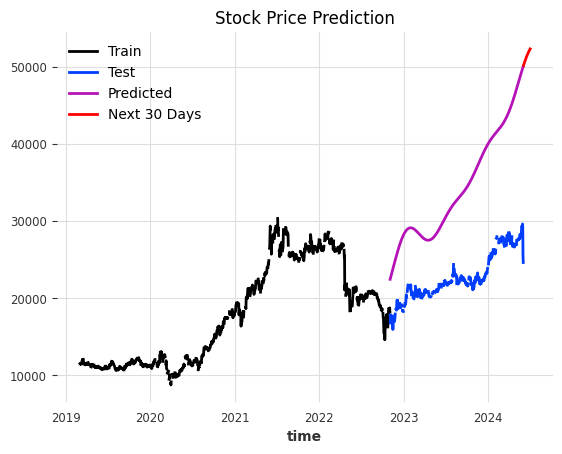

In [24]:
# 7.1. Plotting for forcasting next 30days

train.plot(label="Train")
test.plot(label="Test")
y_pred.plot(label="Predicted")
y_pred_30.plot(label="Next 30 Days", color='r')
plt.legend()
plt.title("Stock Price Prediction")
plt.show()

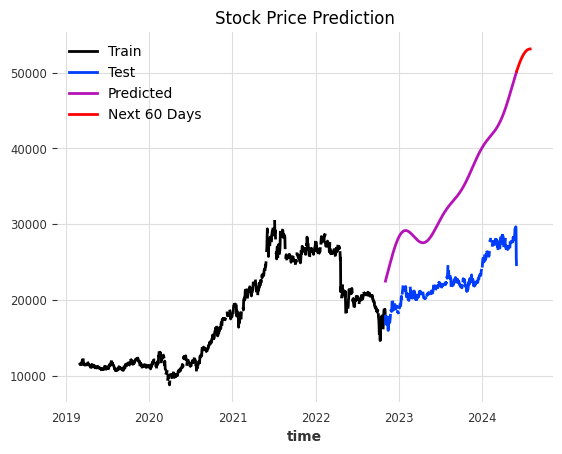

In [25]:
# 7.2. Plotting for forcasting next 60days

train.plot(label="Train")
test.plot(label="Test")
y_pred.plot(label="Predicted")
y_pred_60.plot(label="Next 60 Days", color='r')
plt.legend()
plt.title("Stock Price Prediction")
plt.show()

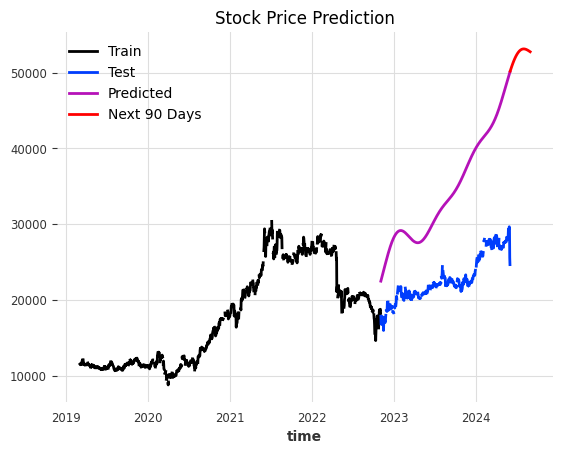

In [26]:
# 7.2. Plotting for forcasting next 90days

train.plot(label="Train")
test.plot(label="Test")
y_pred.plot(label="Predicted")
y_pred_90.plot(label="Next 90 Days", color='r')
plt.legend()
plt.title("Stock Price Prediction")
plt.show()